# PROJECT - 17 WORLD HAPPINESS SCORE DATASET

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("happiness_score_dataset.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [4]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [5]:
df.shape

(158, 12)

In [6]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df.head(1)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738


In [8]:
df['Region'] = le.fit_transform(df['Region'])
df.head(1)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738


In [9]:
df['Happiness Rank'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158], dtype=int64)

In [10]:
df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


<div class="alert-danger">

Key Observation:-
    
 1. Standard Deviation is not high so the data is not so much dispersed.
    
 2. Median is high than in some columns like Economy,Family,Health,Freedom, means data is left skewed and skewnee is                present.
    
 3. Diference between 75% and maximum is not high so may be there is minimum outliers present in the dataset.
    
 4. As in all column count is 158 we can observe that there is no missing value
    
 5. Happiness Score have slightly high mean value than Median so it has right skeweness.
    
    

</div>
    
    

<div class="alert-info">
 EXPLORATORY DATA ANALYSIS
</div>

In [11]:
 df.isnull().sum(
 )

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

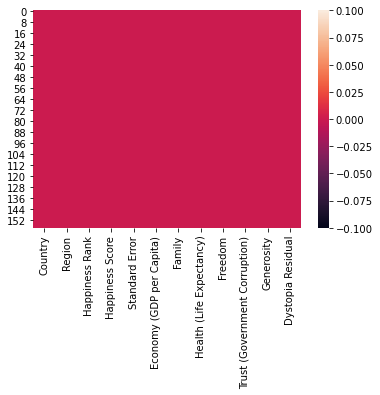

In [12]:
sns.heatmap(df.isnull())

In [13]:
dfcor = df.corr()
dfcor


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


In [14]:
dfcor.head(1)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.0,0.005092,-0.098538,0.08338,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778


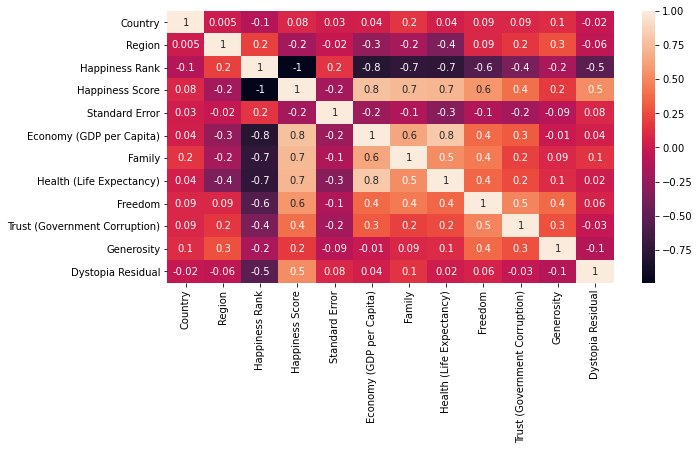

In [15]:
plt.figure(figsize = (10,5))
sns.heatmap(dfcor,annot=True,fmt='.1g')

<div class="alert-info">
Observation:-
    
Happiness Rank is very negatively behave with Happiness Score
    
Economy(GDP Per Capita is strongly postive behave with target column.

Happiness Rank,Region,Standard Error is negative behave with target data.
    
Highest Negative behave - Happiness Rank
    
Highest Positive behave - Economy (GDP per Capita)
    

</div>

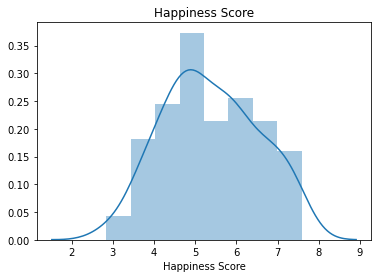

In [16]:
sns.distplot(df['Happiness Score'])
plt.title("Happiness Score")
plt.show()

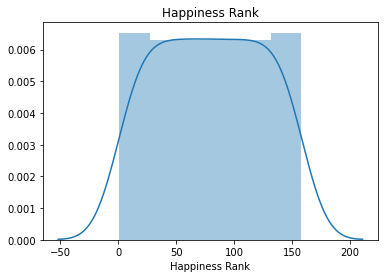

In [17]:
sns.distplot(df['Happiness Rank'])
plt.title("Happiness Rank")
plt.show()

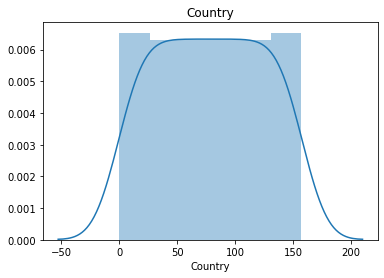

In [18]:
sns.distplot(df['Country'])
plt.title("Country")
plt.show()

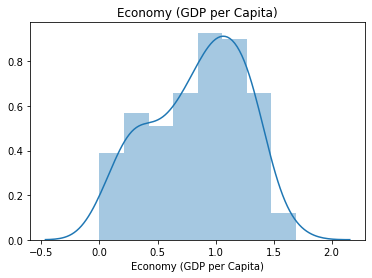

In [19]:
sns.distplot(df['Economy (GDP per Capita)'])
plt.title("Economy (GDP per Capita)")
plt.show()

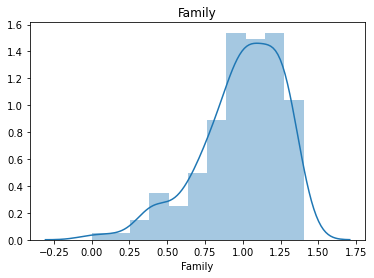

In [20]:
sns.distplot(df['Family'])
plt.title("Family")
plt.show()

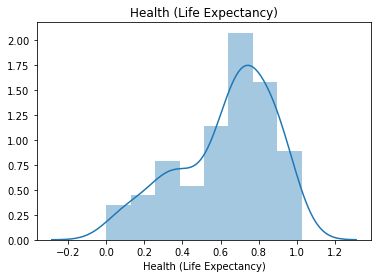

In [21]:
sns.distplot(df['Health (Life Expectancy)'])
plt.title("Health (Life Expectancy)")
plt.show()

<div class="alert-warning">
As we saw earlier Economy, Family and Health columns median is greater thn mean so dat is left skewed.
    
As per above observation this is confirm that skewness is present in thsese 3 columns.    
Also Coutry, Region, Happiness Rank is normally distributed.     
Happiness score distribution is right skewed means positive skewnees present.

</div>

In [22]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

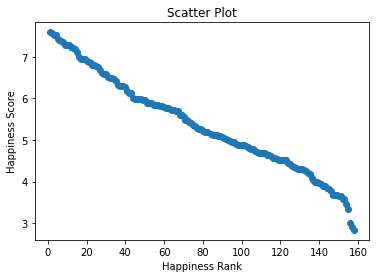

In [23]:
plt.scatter(df['Happiness Rank'],df['Happiness Score'])
plt.title("Scatter Plot")
plt.xlabel("Happiness Rank")
plt.ylabel("Happiness Score")
plt.show()

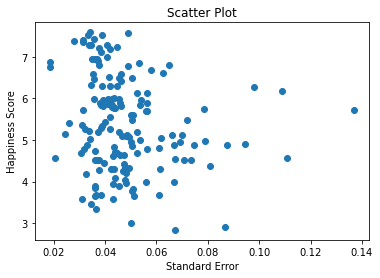

In [24]:
plt.scatter(df['Standard Error'],df['Happiness Score'])
plt.title("Scatter Plot")
plt.xlabel("Standard Error")
plt.ylabel("Happiness Score")
plt.show()

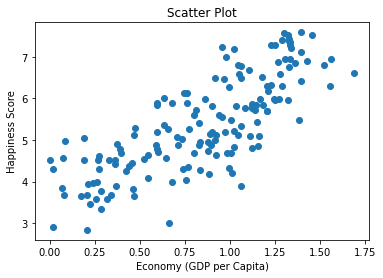

In [25]:
plt.scatter(df['Economy (GDP per Capita)'],df['Happiness Score'])
plt.title("Scatter Plot")
plt.xlabel("Economy (GDP per Capita)")
plt.ylabel("Happiness Score")
plt.show()

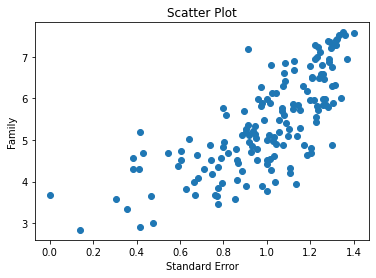

In [26]:
plt.scatter(df['Family'],df['Happiness Score'])
plt.title("Scatter Plot")
plt.xlabel("Standard Error")
plt.ylabel("Family")
plt.show()

As we see in corelation heatmap Happiness score is highly negative behave with happiness score and Economy and family they are highly psitive behaving.

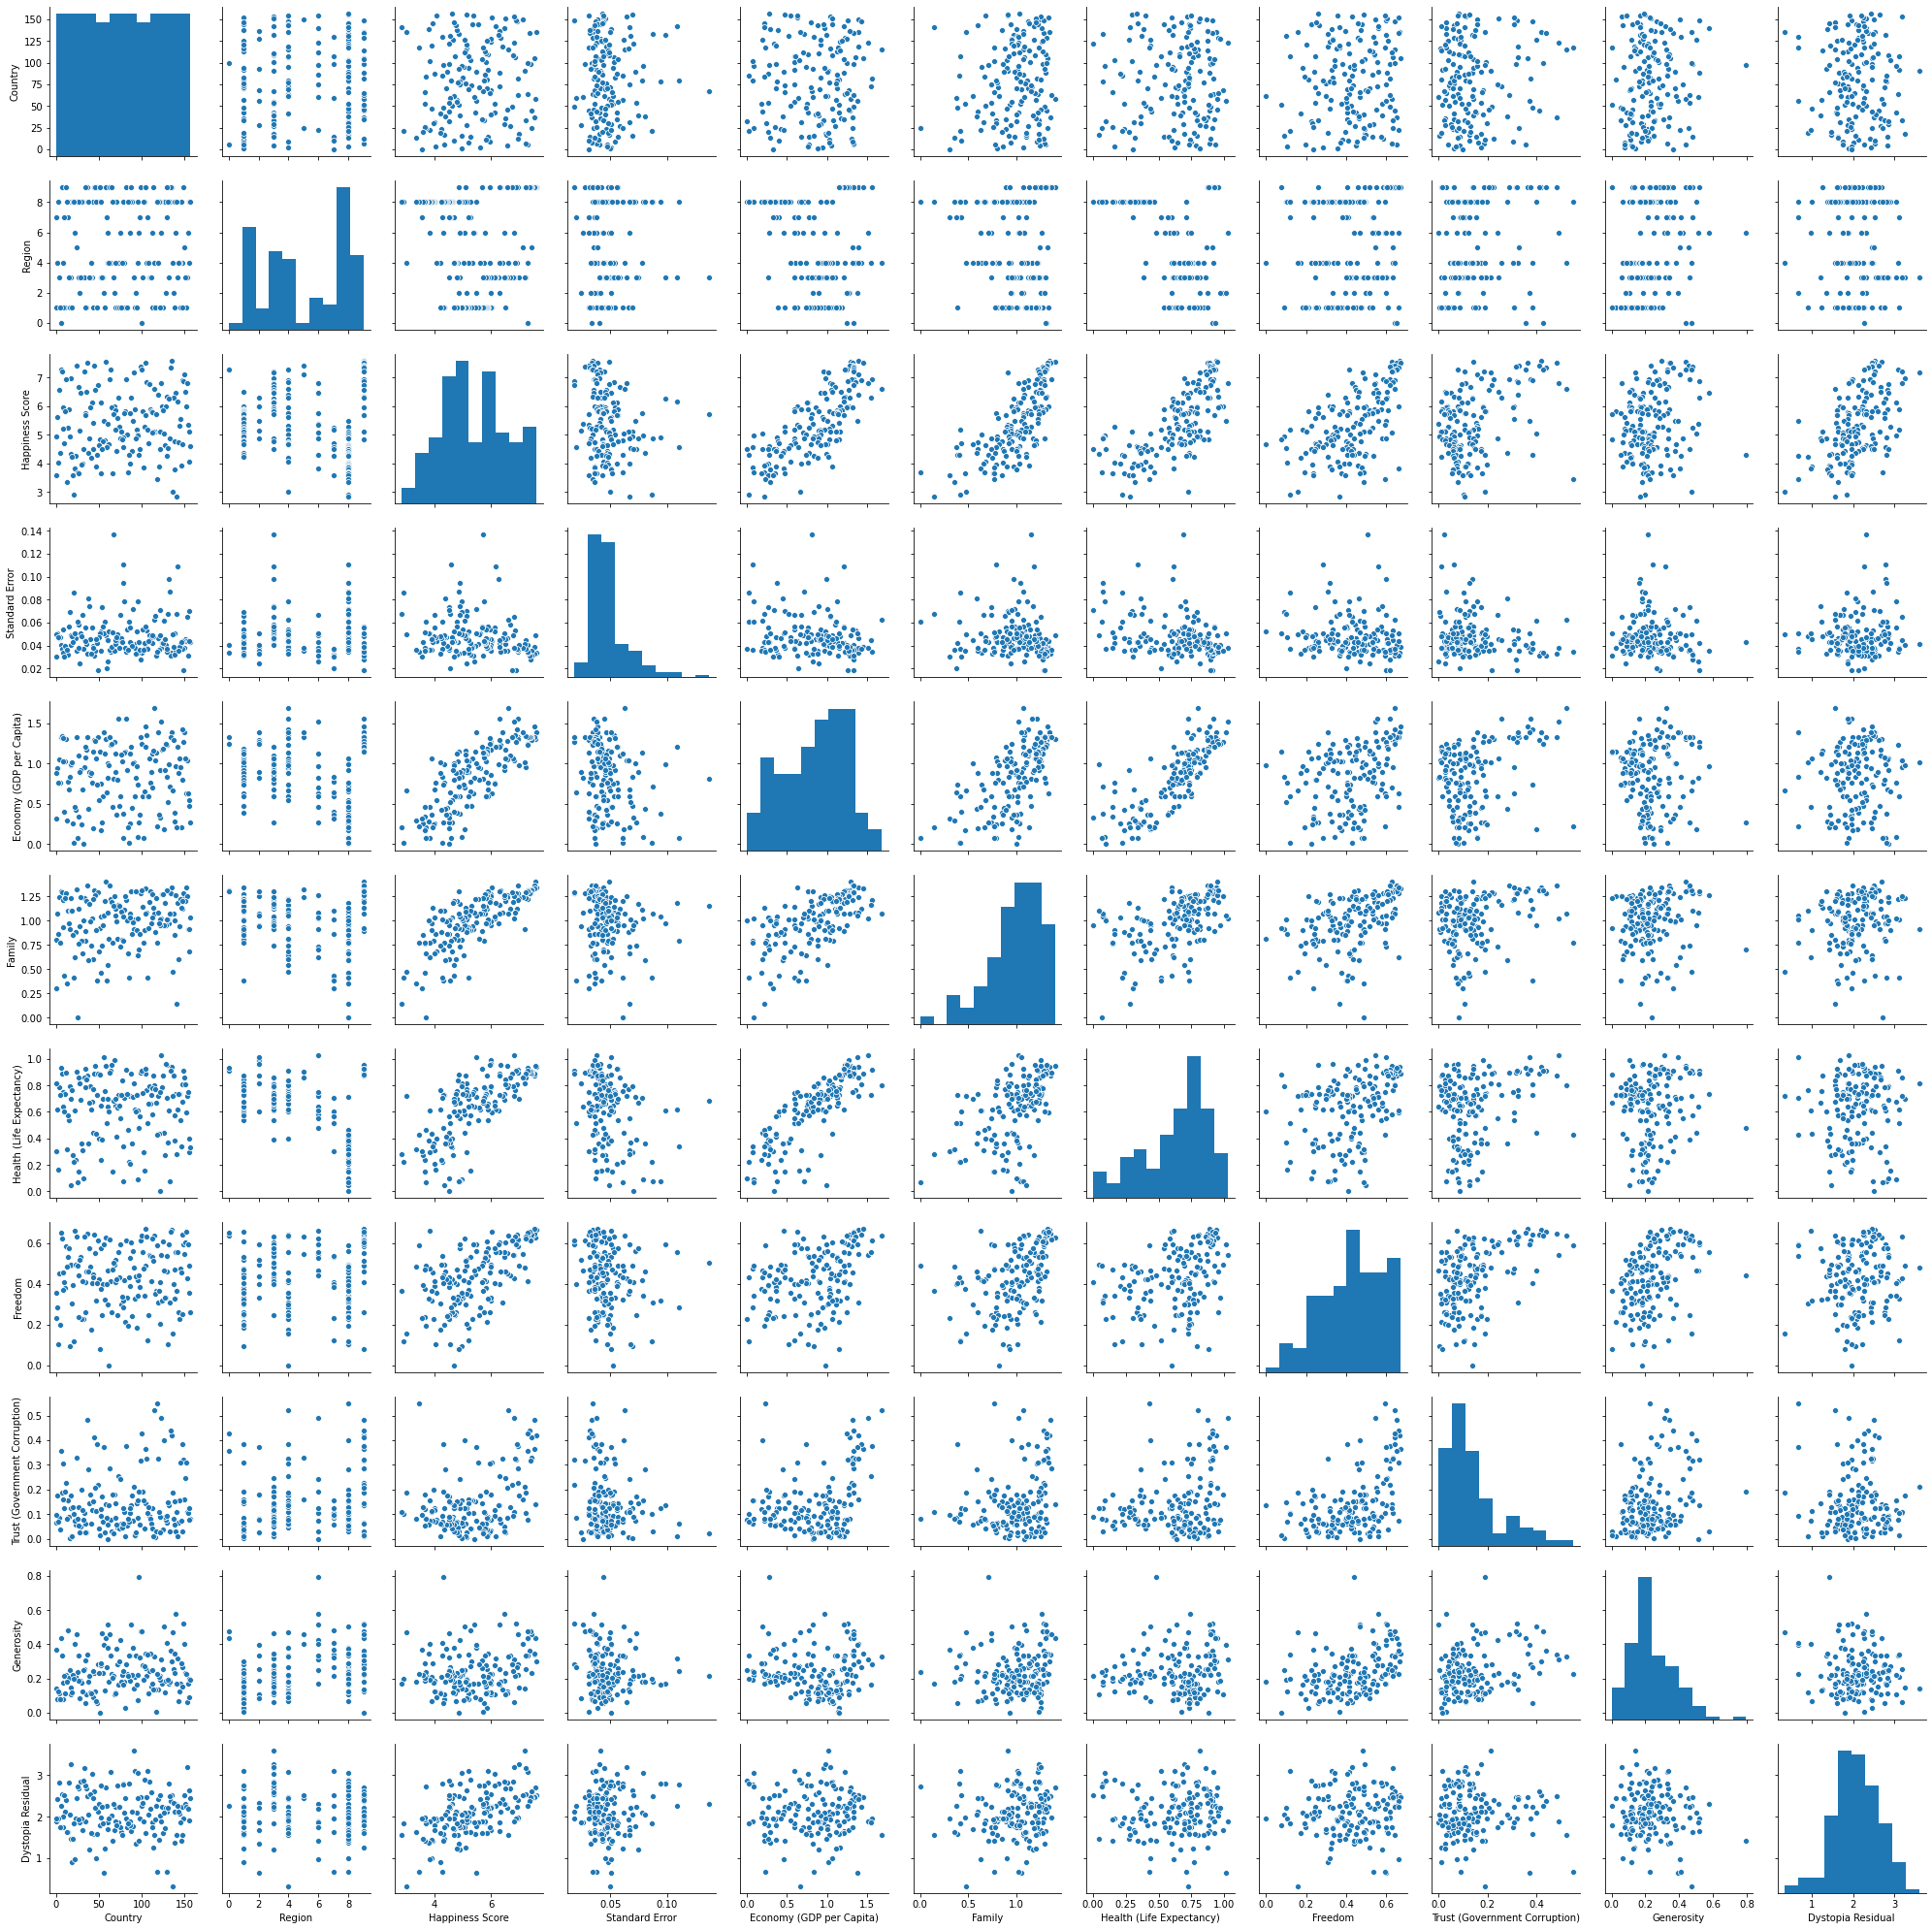

In [45]:
sns.pairplot(df)

In [46]:
collist = df.columns.values
ncol=12
nrows=10


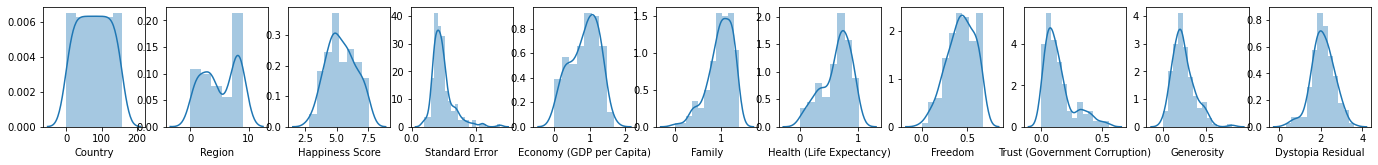

In [50]:
plt.figure(figsize = (26,26))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])


In [27]:
#Droping Happiness Score as it is strongly negative behaving witjh target data.
df.drop("Happiness Rank",axis = 1,inplace=True)
df.sample()

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
140,146,8,3.931,0.04317,0.21102,1.13299,0.33861,0.45727,0.07267,0.29066,1.42766


# Handling Outliers

In [28]:
#Checking Outliers using boxplot


In [39]:
collist = df.columns.values
ncol=12
nrows=10


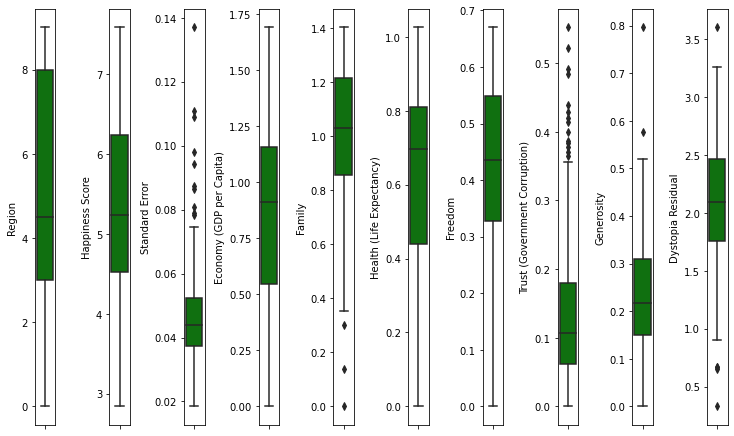

In [44]:
plt.figure(figsize = (ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color ='green',orient='v')
    plt.tight_layout()
    

From above observation we can find that Standard Error, Family,Trust and Dystopia residual columns have outliers present.

Country                             AxesSubplot(0.125,0.657941;0.168478x0.222059)
Region                           AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Happiness Score                  AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Standard Error                   AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Economy (GDP per Capita)            AxesSubplot(0.125,0.391471;0.168478x0.222059)
Family                           AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Health (Life Expectancy)         AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Freedom                          AxesSubplot(0.731522,0.391471;0.168478x0.222059)
Trust (Government Corruption)          AxesSubplot(0.125,0.125;0.168478x0.222059)
Generosity                          AxesSubplot(0.327174,0.125;0.168478x0.222059)
Dystopia Residual                   AxesSubplot(0.529348,0.125;0.168478x0.222059)
dtype: object

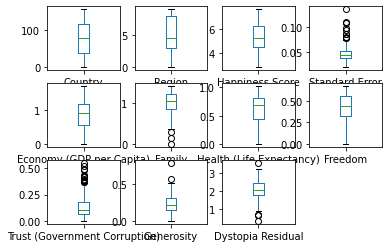

In [58]:
#bos.plot

df.plot(kind ='box',subplots=True,layout=(3,4))

In [60]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
threshold =3
new_df = df[(z<3).all(axis=1)]
new_df

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
150,66,8,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20,8,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0,7,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13,8,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [61]:
df

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [62]:
#Percentage Loss of data after removing outliers
percentage_loss=((9)/158)*100
percentage_loss

5.69620253164557

In [63]:
#IQR Method

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Country                          78.500000
Region                            5.000000
Happiness Score                   1.717750
Standard Error                    0.015032
Economy (GDP per Capita)          0.612640
Family                            0.357582
Health (Life Expectancy)          0.371828
Freedom                           0.220762
Trust (Government Corruption)     0.118580
Generosity                        0.159330
Dystopia Residual                 0.703005
dtype: float64


In [65]:
df_new1 = df[~((df<(Q1-1.5*IQR)) | (df> (Q3+1.5*IQR))).any(axis=1)]
print(df_new1.shape)

(126, 11)


In [69]:
#We will continue with zscore method to remove outliers
new_df.sample()

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
116,59,7,4.565,0.02043,0.64499,0.38174,0.51529,0.39786,0.08492,0.26475,2.27513


In [70]:
print("Original Shape =",df.shape,"\nNew Shape =",new_df.shape)

Original Shape = (158, 11) 
New Shape = (149, 11)


In [71]:
#Remove Skewness
new_df.skew()

Country                          0.048701
Region                          -0.096985
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

Skewness is acceptable in range +/-0.5. So Skewness is present in our data as we see above and also form above observations

In [72]:
#Removing skewness
from sklearn.preprocessing import power_transform
df = power_transform(df,method = 'yeo-johnson')

# Preparing Dataset for model training

In [73]:
#Seprating independent and target variable
x= new_df.drop("Happiness Score",axis=1)
y= new_df["Happiness Score"] #Target variable

In [77]:
#Linear Dimensionality Reduction
pca = PCA(n_components = 10)
x= pca.fit_transform(x)
x.shape

(149, 10)

# Scaling

In [84]:
#Scaling the dataset using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaledX = sc.fit_transform(x)
x.shape

(149, 10)

In [85]:
#Finding Best Random State
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

best_rstate=0
accu=0

for i in range(30,200):
    x_train,x_test,y_train,y_test = train_test_split(scaledX,y,test_size = .25,random_state=i)
    mod = LinearRegression()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    tempaccu = r2_score(y_test,y_pred)
    
    if tempaccu>accu:
        accu = tempaccu
        best_rstate = i
        
        
        
print(f"Best Accuracy {accu*100} found on random_state {best_rstate}")
    



Best Accuracy 99.99999595690518 found on random_state 117


In [86]:
#Creating Train_Test_Split using best random_state
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaledX,y,test_size=.25,random_state=117)

# Finding The Best Model

In [106]:
#Using Linear Regression Creating Model

In [107]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)
r2score = r2_score(y_test,y_pred)
cvscore = cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print(f"Accuracy = {r2score*100},Cross_val_score={cvscore*100} & difference = {(r2score*100)-(cvscore*100)}")

Accuracy = 99.99999595690518,Cross_val_score=99.99998948261316 & difference = 6.474292021607653e-06


In [114]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train,y_train)
y_pred = RF.predict(x_test)
r2score = r2_score(y_test,y_pred)
cvscore = cross_val_score(RandomForestRegressor(),x_train,y_train,cv=5).mean()
print(f"Accuracy = {r2score*100},Cross_val_score={cvscore*100} & difference = {(r2score*100)-(cvscore*100)}")


Accuracy = 95.97701273095153,Cross_val_score=85.05568193016597 & difference = 10.921330800785555


In [115]:
from sklearn.ensemble import AdaBoostRegressor
ADB = AdaBoostRegressor()
ADB.fit(x_train,y_train)
y_pred = ADB.predict(x_test)
r2score = r2_score(y_test,y_pred)
cvscore = cross_val_score(AdaBoostRegressor(),x_train,y_train,cv=5).mean()
print(f"Accuracy = {r2score*100},Cross_val_score={cvscore*100} & difference = {(r2score*100)-(cvscore*100)}")


Accuracy = 92.78145653750971,Cross_val_score=81.44943992996853 & difference = 11.332016607541178


In [116]:
from sklearn.linear_model import SGDRegressor
SGD = SGDRegressor()
SGD.fit(x_train,y_train)
y_pred = SGD.predict(x_test)
r2score = r2_score(y_test,y_pred)
cvscore = cross_val_score(SGDRegressor(),x_train,y_train,cv=5).mean()
print(f"Accuracy = {r2score*100},Cross_val_score={cvscore*100} & difference = {(r2score*100)-(cvscore*100)}")


Accuracy = 99.43046810197235,Cross_val_score=99.02988272623709 & difference = 0.4005853757352611


Linear Regressionr and  SGD Regressor model performing best and almost same, so i will use one of them

# Hyperparameter Tuning

In [136]:
parameters = {"max_iter": [500,700,900,1100,1200,1300,1400,1500],
              "alpha" :[0.0001,0.001,0.01,0.1,1,10,100],
               "penalty": ["elasticnet","l1","l2"]}

In [137]:
from sklearn.model_selection import GridSearchCV

GCV = GridSearchCV(SGDRegressor(),parameters,cv=5,scoring = 'r2')
GCV.fit(x_train,y_train)
GCV.best_estimator_
GCV_pred = GCV.best_estimator_.predict(x_test)
print("Final Accuracy :",r2_score(y_test,GCV_pred)*100)

Final Accuracy : 99.42121571732928


# Regularization

In [141]:
from sklearn.linear_model import Lasso
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [142]:
ls = Lasso(alpha=0.0001,random_state = 0)
ls.fit(x_train,y_train)
pred_ls = ls.predict(x_test)
lss= r2_score(y_test,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,scaledX,y,cv=j)
    lsc = lsscore.mean()
    print('AT CV = ',j)
    print("cross validation score is :- ",lsc*100)
    print("r2_score is :- ",lss*100)
    print("\n")

AT CV =  2
cross validation score is :-  99.99848792148039
r2_score is :-  99.99998756320491


AT CV =  3
cross validation score is :-  99.99917619213997
r2_score is :-  99.99998756320491


AT CV =  4
cross validation score is :-  99.99907415370876
r2_score is :-  99.99998756320491


AT CV =  5
cross validation score is :-  99.99915971829488
r2_score is :-  99.99998756320491


AT CV =  6
cross validation score is :-  99.99888600081054
r2_score is :-  99.99998756320491


AT CV =  7
cross validation score is :-  99.9987728245619
r2_score is :-  99.99998756320491


AT CV =  8
cross validation score is :-  99.9985904810112
r2_score is :-  99.99998756320491


AT CV =  9
cross validation score is :-  99.9983617163543
r2_score is :-  99.99998756320491




AT CV = 3 model is performing well as hight r2_score and CV_score is both.

In [143]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [146]:
print("Error:")

print('Mean Absolute Error:= ',mean_absolute_error(y_test,pred_ls))
print('Mean Squared Error:= ',mean_squared_error(y_test,pred_ls))
print("Root Mean Square Error;= ",np.sqrt(mean_squared_error(y_test,pred_ls)))

Error:
Mean Absolute Error:=  0.00035738405951484485
Mean Squared Error:=  2.012888718196889e-07
Root Mean Square Error;=  0.000448652283867684


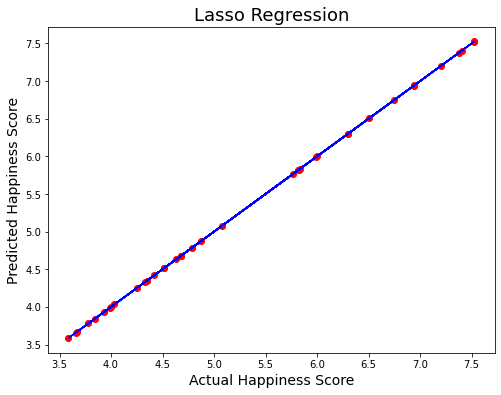

In [151]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_ls,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Happiness Score",fontsize = 14)
plt.ylabel("Predicted Happiness Score",fontsize =14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

In [155]:
from sklearn.linear_model import Ridge
parameters = {'alpha':[.0001,.001,.01,.1,1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'random_state':list(range(0,10)),'tol':[.0001,.001,.01,.1,1]}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.001, 'copy_X': True, 'fit_intercept': True, 'normalize': False, 'random_state': 0, 'tol': 0.0001}


In [157]:
rd = Ridge(alpha=0.001,copy_X=True,fit_intercept=True,normalize=True,random_state = 0,tol=0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd = rd.predict(x_test)
rds= r2_score(y_test,pred_rd)
print("R2-Score= ",rds*100)
rdscore = cross_val_score(rd,scaledX,y,cv=3)
rdc=rdscore.mean()
print("Cross Val Score= ",rdc*100)

R2-Score=  99.99985231527322
Cross Val Score=  99.99094265299541


In [158]:
print("Error:")

print('Mean Absolute Error:= ',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:= ',mean_squared_error(y_test,pred_rd))
print("Root Mean Square Error;= ",np.sqrt(mean_squared_error(y_test,pred_rd)))

Error:
Mean Absolute Error:=  0.0014073469198917557
Mean Squared Error:=  2.390269505594463e-06
Root Mean Square Error;=  0.001546049645255437


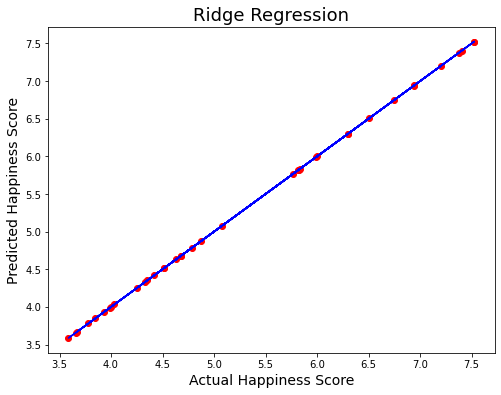

In [159]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_rd,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Happiness Score",fontsize = 14)
plt.ylabel("Predicted Happiness Score",fontsize =14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

<span style='color:green'>
As per above observtions i found:-
    
Best models are :-
        
1.Linear regression:-
r2_score=99.99999595690518,Cross_val_score=99.99998948261316
        
2.SGD Regressor:-
r2_score = 99.43046810197235,Cross_val_score=99.02988272623709 &
        
3.Lasso regressor:-
cross validation score is :-  99.99917619213997
r2_score is :-  99.99998756320491
            
4.Ridge regressor:-
R2-Score=  99.99985231527322
Cross Val Score=  99.99094265299541
        
In these 4 models i am taking Lasso regressor is best model as minimum diffrence in rescore and cross vaal score
and in plot i saw best fit.(However all models are performing almost similar)

 </span>

# Model Saving

In [167]:
import pickle
filename = 'World_Happiness_Report.pkl'
pickle.dump(ls,open(filename,'wb'))

In [171]:
#I prefer 2nd option which is:-

import joblib 

joblib.dump(ls,'lsfile.obj')

['lsfile.obj']

In [172]:
ls_from_joblib = joblib.load('lsfile.obj')

In [173]:
ls_from_joblib.predict(x_test)

array([6.30238638, 4.41957632, 5.83283243, 7.3778263 , 4.78627462,
       3.98926303, 3.93095609, 3.845276  , 5.98700828, 4.33280969,
       3.58741979, 3.9950145 , 4.51753468, 7.52176887, 5.77051892,
       3.78093785, 7.40579158, 6.94005795, 6.29799334, 4.8744272 ,
       4.68068047, 6.50522778, 3.66796887, 4.252612  , 7.52663328,
       4.63396313, 6.9459949 , 5.82408542, 4.67743735, 4.35037012,
       5.07329474, 5.81257128, 4.51753223, 6.75037051, 6.00205353,
       7.19999031, 3.65646611, 4.03377964])

# Conclusion

In [162]:
a=np.array(y_test)
a

array([6.302, 4.419, 5.833, 7.378, 4.786, 3.989, 3.931, 3.845, 5.987,
       4.332, 3.587, 3.995, 4.517, 7.522, 5.77 , 3.781, 7.406, 6.94 ,
       6.298, 4.874, 4.681, 6.505, 3.667, 4.252, 7.527, 4.633, 6.946,
       5.824, 4.677, 4.35 , 5.073, 5.813, 4.518, 6.75 , 6.003, 7.2  ,
       3.656, 4.033])

In [163]:
predicted = np.array(ls.predict(x_test))
predicted

array([6.30238638, 4.41957632, 5.83283243, 7.3778263 , 4.78627462,
       3.98926303, 3.93095609, 3.845276  , 5.98700828, 4.33280969,
       3.58741979, 3.9950145 , 4.51753468, 7.52176887, 5.77051892,
       3.78093785, 7.40579158, 6.94005795, 6.29799334, 4.8744272 ,
       4.68068047, 6.50522778, 3.66796887, 4.252612  , 7.52663328,
       4.63396313, 6.9459949 , 5.82408542, 4.67743735, 4.35037012,
       5.07329474, 5.81257128, 4.51753223, 6.75037051, 6.00205353,
       7.19999031, 3.65646611, 4.03377964])

In [164]:
df_com = pd.DataFrame({"Original":a,'Predicted':predicted},index = range(len(a)))
df_com

,Original,Predicted
0,6.302,6.302386
1,4.419,4.419576
2,5.833,5.832832
3,7.378,7.377826
4,4.786,4.786275
5,3.989,3.989263
6,3.931,3.930956
7,3.845,3.845276
8,5.987,5.987008
9,4.332,4.332810


# END OF PROJECT